In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from keras.datasets import mnist

(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


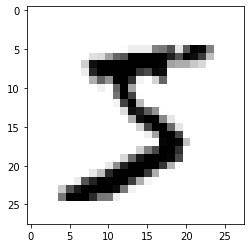

In [4]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [5]:
## Data Preprocessing and normalizing the data between 0 and 1
x_train = x_train.reshape(60000,784)
x_train = x_train/255
x_test = x_test.reshape(10000,784)
x_test = x_test/255

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
s = StandardScaler()


In [8]:
x_train = s.fit_transform(x_train)
x_test  = s.fit_transform(x_test)

## Kernel SVM-RBF:

In [9]:
from sklearn.svm import SVC 

In [10]:
model = SVC(C=1,kernel='rbf')

In [11]:
model.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
predictions = model.predict(x_test)

In [14]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions))


Testing Accuracy =  0.9656


In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [16]:
print(confusion_matrix(y_test,predictions))

[[ 967    0    2    1    0    3    3    2    2    0]
 [   0 1125    5    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    3  980    1    7    0   12    7    0]
 [   0    0   13    0  945    2    3    7    2   10]
 [   2    0    2   11    1  857    6    5    6    2]
 [   6    2    0    0    4    8  927    6    5    0]
 [   1    6   13    3    3    0    0  989    0   13]
 [   3    0    6    5    6   10    3   12  926    3]
 [   4    5    6   11   13    2    0   21    3  944]]


## Kernel SVM-RBF with PCA

In [17]:
x_train_PCA = x_train
x_test_PCA = x_test

In [18]:
## Applying PCA on the Dataset
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=0.97)        # Should lie between 0.95 to 0.99
x_train_PCA = pca.fit_transform(x_train_PCA)  
x_test_PCA = pca.transform(x_test_PCA)

In [21]:
 model_PCA = SVC(C=1,kernel='rbf')

In [22]:
model_PCA.fit(x_train_PCA,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
predictions_PCA = model_PCA.predict(x_test_PCA)

In [24]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions_PCA))


Testing Accuracy =  0.9685


In [25]:
print(classification_report(y_test,predictions_PCA))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.97      0.95      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [26]:
print(confusion_matrix(y_test,predictions_PCA))

[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1128    3    0    0    1    1    0    2    0]
 [   5    1  997    2    1    0    1   15    9    1]
 [   0    0    3  982    1    6    0   11    7    0]
 [   0    0   10    0  947    2    3    8    2   10]
 [   2    0    1    9    1  860    6    5    6    2]
 [   6    2    0    0    4    8  930    5    3    0]
 [   2    7   11    2    1    0    0  994    1   10]
 [   3    0    4    5    6    9    3   11  931    2]
 [   4    5    6    9   12    2    0   19    4  948]]


## Kernel SVM-RBF with LDA

In [27]:
x_train_LDA = x_train
x_test_LDA = x_test

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [29]:
  lda = LDA(n_components=9)
  x_train_LDA = lda.fit_transform(x_train_LDA,y_train)  
  x_test_LDA = lda.transform(x_test_LDA)

In [30]:
model_LDA = SVC(C=1,kernel='rbf')

In [31]:
model_LDA.fit(x_test_LDA,y_test)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
predictions_LDA = model_LDA.predict(x_test_LDA)

In [34]:
print("\nTesting Accuracy = ", accuracy_score(y_true=y_test, y_pred=predictions_LDA))


Testing Accuracy =  0.9207


In [35]:
print(classification_report(y_test,predictions_LDA))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.95      0.97      0.96      1135
           2       0.92      0.93      0.92      1032
           3       0.90      0.89      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.89      0.88      0.89       892
           6       0.94      0.95      0.95       958
           7       0.94      0.91      0.93      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [36]:
print(confusion_matrix(y_test,predictions_LDA))

[[ 955    0    3    2    0    4    9    1    6    0]
 [   0 1104    7    2    1    1    3    1   16    0]
 [   7    5  955   13    9    3   12    7   19    2]
 [   3    3   23  901    1   34    0   14   23    8]
 [   0    0    4    0  910    0   16    3    9   40]
 [   8    2    7   38    6  786    9    3   31    2]
 [  10    3    7    0    6   16  911    0    5    0]
 [   1   14   19    6    6    0    1  940    1   40]
 [   5   26   12   26   13   31    4    7  844    6]
 [   8    3    2   13   41    4    2   23   12  901]]
